# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as s

In [2]:
data=pd.read_csv('C:/Users/jasro/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
data.dropna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
data.shape

(1000, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
data.describe(include=['object'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [9]:
data['gender'].value_counts() #balaced datset on basis of gender

female    518
male      482
Name: gender, dtype: int64

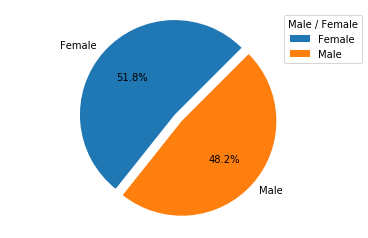

In [10]:
label1 = ["Female", "Male"]
quantity = [518,482]
Explode = [0.1,0] 
plt.pie(quantity,explode=Explode, labels=label1, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.legend(title="Male / Female",loc='best',bbox_to_anchor=(0.8, 1))
plt.show()

Inferences
1. male and female are in comparable ratio

In [11]:
data['race/ethnicity'].value_counts() #groups are not balanced 

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

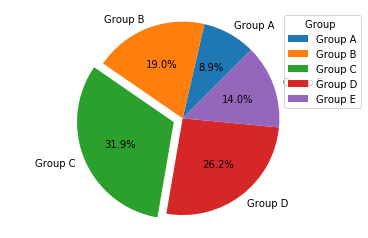

In [12]:
group_names = ["Group A", "Group B","Group C","Group D","Group E"]
quantity = [89,190,319,262,140]
Explode = [0,0,0.1,0,0] 
plt.pie(quantity,explode=Explode, labels=group_names, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.legend(title="Group ",loc='best',bbox_to_anchor=(0.8, 1))
plt.show()

Group C has the highest number of people

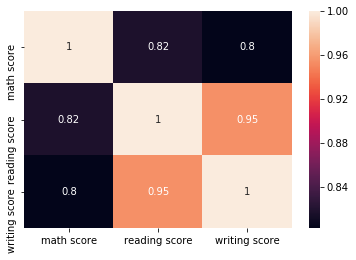

In [13]:
sns.heatmap(data.corr(), annot=True)
plt.show()

Inferences
1. math score, reading score and writing score has high positive correlation

In [14]:
grouped=data.groupby('race/ethnicity')
mean_table=grouped.aggregate(np.mean)
mean_table                  #average scores of different race/ethnicities

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


 average scores of different race/ethnicities

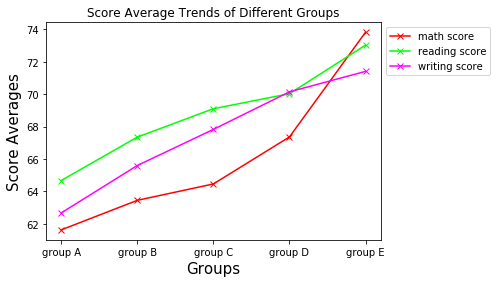

In [15]:
group_labels=mean_table.index.tolist()
plt.plot(group_labels,mean_table['math score'].tolist(),marker='x',label='math score',color='red')
plt.plot(group_labels,mean_table['reading score'].tolist(),marker='x',label='reading score',color='lime')
plt.plot(group_labels,mean_table['writing score'].tolist(),marker='x',label='writing score',color='magenta')
plt.legend(loc='best',bbox_to_anchor=(1,1))
plt.xlabel('Groups',size='15')
plt.ylabel('Score Averages',size='15')
plt.title("Score Average Trends of Different Groups")
plt.show()

Inferences
1. As we gor from group A to group E the average score in math,reading and writing increases


In [17]:
group_a=data[data['race/ethnicity']=='group A']
group_b=data[data['race/ethnicity']=='group B']
group_c=data[data['race/ethnicity']=='group C']
group_d=data[data['race/ethnicity']=='group D']
group_e=data[data['race/ethnicity']=='group E']

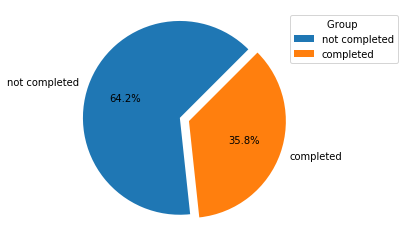

In [18]:
quantity =data['test preparation course'].value_counts().tolist()
Explode = [0.1,0] 
plt.pie(quantity,explode=Explode, labels=['not completed','completed'], autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.legend(title="Group ",loc='best',bbox_to_anchor=(0.8, 1))
plt.show()

Inferences
1. number of people who have not completed is greater

In [19]:
prep_done=data[data['test preparation course']=='completed']
non_prep_done=data[data['test preparation course']=='none']

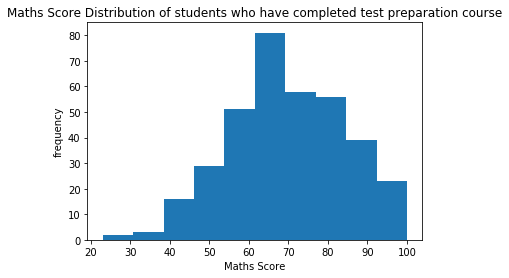

In [20]:
plt.hist(prep_done['math score'].tolist())
plt.title("Maths Score Distribution of students who have completed test preparation course")
plt.xlabel('Maths Score')
plt.ylabel('frequency')
plt.show()

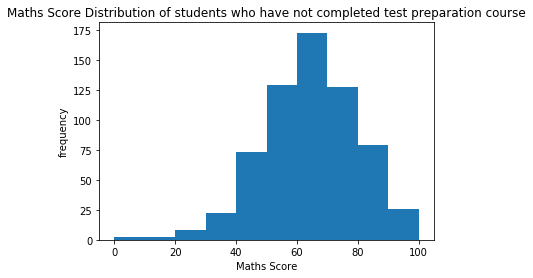

In [21]:
plt.hist(non_prep_done['math score'].tolist())
plt.title("Maths Score Distribution of students who have not completed test preparation course")
plt.xlabel('Maths Score')
plt.ylabel('frequency')
plt.show()

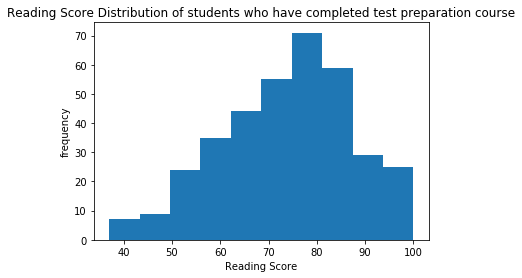

In [22]:
plt.hist(prep_done['reading score'].tolist())
plt.title("Reading Score Distribution of students who have completed test preparation course")
plt.xlabel('Reading Score')
plt.ylabel('frequency')
plt.show()

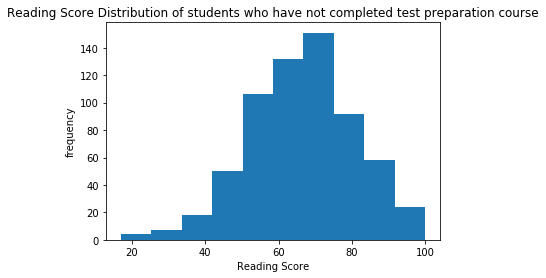

In [23]:
plt.hist(non_prep_done['reading score'].tolist())
plt.title("Reading Score Distribution of students who have not completed test preparation course")
plt.xlabel('Reading Score')
plt.ylabel('frequency')
plt.show()

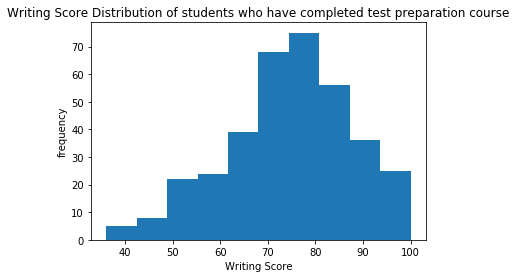

In [24]:
plt.hist(prep_done['writing score'].tolist())
plt.title("Writing Score Distribution of students who have completed test preparation course")
plt.xlabel('Writing Score')
plt.ylabel('frequency')
plt.show()

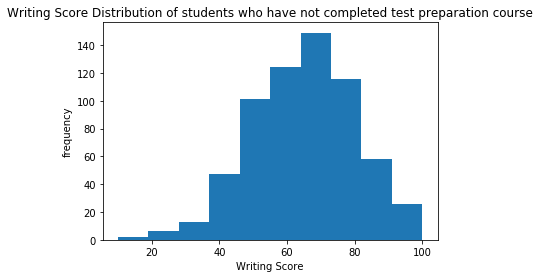

In [25]:
plt.hist(non_prep_done['writing score'].tolist())
plt.title("Writing Score Distribution of students who have not completed test preparation course")
plt.xlabel('Writing Score')
plt.ylabel('frequency')
plt.show()

Inferences
1. mark distribution of both categories who have and have not completed test preparation course have performed comparably but      to see a viable difference both categories needs to be balanced. 

Text(0.5, 0, 'reading score')

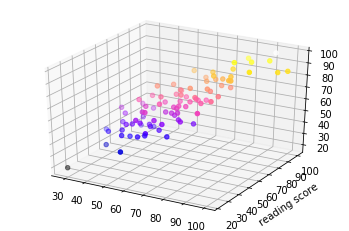

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax=plt.axes(projection='3d')
ax.scatter3D(group_a['math score'].tolist(),group_a['reading score'].tolist(),group_a['writing score'].tolist(),c=group_a['writing score'].tolist(),cmap='gnuplot2')
plt.ylabel('reading score')

Pre-elimanaries 

x-axis is math score , y-axis is reading score and z-axis writing score

In [27]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

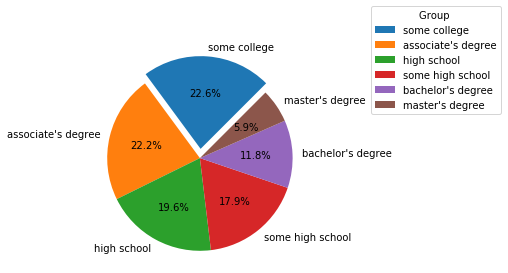

In [28]:
quantity =data['parental level of education'].value_counts().tolist()
Explode = [0.1,0,0,0,0,0] 
plt.pie(quantity,explode=Explode, labels=data['parental level of education'].value_counts().index.tolist(), autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.legend(title="Group ",loc='best',bbox_to_anchor=(1, 1.2))
plt.show()

Inferences

The highest qualification of parents among all is master's degree

In [29]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [30]:
lunch_standard=data[data['lunch']=='standard']
lunch_reduced=data[data['lunch']!='standard']

In [31]:
total_marks_lunch_standard=np.array(np.array(lunch_standard['math score'].tolist()) + np.array(lunch_standard['reading score'].tolist()) + np.array(lunch_standard['writing score'].tolist()) )

In [32]:
total_marks_lunch_reduced=np.array(np.array(lunch_reduced['math score'].tolist()) + np.array(lunch_reduced['reading score'].tolist()) + np.array(lunch_reduced['writing score'].tolist()) )

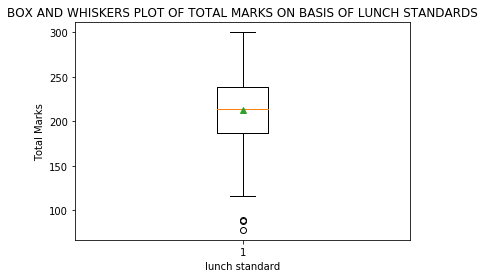

In [36]:
plt.boxplot(total_marks_lunch_standard,showmeans=True)
plt.xlabel('lunch standard')
plt.title('BOX AND WHISKERS PLOT OF TOTAL MARKS ON BASIS OF LUNCH STANDARDS')
plt.ylabel('Total Marks')
plt.show()

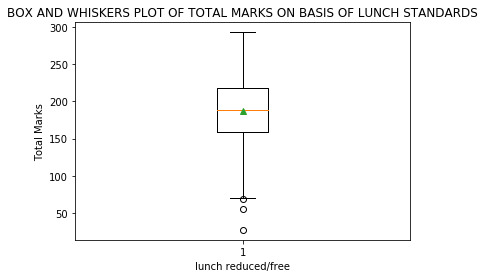

In [37]:
plt.boxplot(total_marks_lunch_reduced,showmeans=True)
plt.title('BOX AND WHISKERS PLOT OF TOTAL MARKS ON BASIS OF LUNCH STANDARDS')
plt.ylabel('Total Marks')
plt.xlabel('lunch reduced/free')
plt.show()